**Probability** and statistics are closely linked because statistical data are frequently analyzed to see whether conclusions can be drawn legitimately about a particular phenomenon and also to make predictions about future events.

**Probability** is used to express how unlikely any deviation from your best estimate is.


Probability is expressed as a floating point number in a range of [0; 1]

There are **theoretical** and **emperical** (practical) probabilities.

In any of both cases - sum of all probabilities shall be equal to 1.

For instance a dice:

*   It has 6 sides
*   probability for each side/number (e.g. 1) to be now on a table is 1/6

Another example - we have a bag of different-color balls (total 30):


*   11 Green
*   6 Blue
*   13 Red

What is a chance to pull Red one from a bag?

P(red) = 13/(11+6+13) = 0.43

In [1]:
from numpy.random import seed, randint

seed(1)

def coin_toss(flips):
  heads = 0
  tails = 0
  for i in range(0, flips):
    if randint(0, 2) == 1: #no nulles līdz 2, neieksatot 2
      heads += 1 #heads = heads +1
    else:
      tails += 1
  return heads/flips

coin_toss(1000)
      
                  

0.478

In [2]:
probabilities = []

for i in range(1, 1000):
  result = (i, coin_toss(i))
  probabilities.append(result)

In [3]:
# Convert our data to a dataframe
import pandas as pd

df = pd.DataFrame(probabilities)
df.columns = ["Number of Coin Tosses", "Probability"]
df.head()

,Number of Coin Tosses,Probability
0,1,0.000000
1,2,0.000000
2,3,0.333333
3,4,0.500000
4,5,0.600000


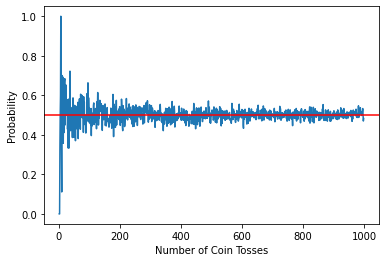

In [4]:
# Now let's create our plot
import matplotlib.pyplot as plt
import seaborn as sns

sns.lineplot(x="Number of Coin Tosses", y="Probability", data=df)
plt.axhline(0.5, color="red")

# Rule of Addition

**Example 1:** *What is a probability to roll a dice with result 1 or 6?*

*P(1) = 1/6*

*P(6) = 1/6*

*P(1 or 6) = 1/6 +1/6 =2/6 = 1/3 = 0.33*

Thus, *P(A or B) = P(A) + P(B)*

Previous example is **Mutually Exclusive** - that means both events can't happen in the same time.

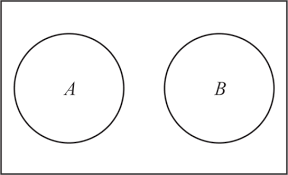

**Example 2:** *What is chance of pulling hearts or King from a deck of cards*

Both events can occur simultaniously, that means they are non-mutually Exclusive.

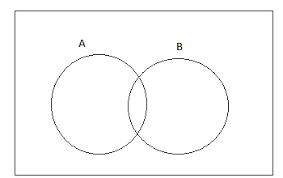

*P(King) = 4/52*

*P(Hearts) = 13/52*

*P(King and Hearts) = 1/52*

*P(King or Hearts) = 4/52 + 13/52 - 1/52 = 16/52*

*P(King or Hearts) = 0.31*

**Example 3:** *what is probability to pull 3 aces in a row from deck of cards?*

*P(1st Ace) = 4/52*

*P(2nd Ace) = 3/51*

*P(3rd Ace) = 2/50*

Pēc tam visas varbūtibas reizina

P(3 Aces) = 4 * 3 * 2/52 * 51 * 50 =0.000181

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Bayes' Classifier

Let's uppload a data-set

In [6]:
import pandas as pd

nb_tennis_file_name = "/content/drive/MyDrive/Data analytics course/Bayes Classifier.tsv"

nb_tennis_df = pd.read_csv(nb_tennis_file_name, sep="\t", index_col=0) #taba simbols ir "\t"
nb_tennis_df.head()

,outlook,temp,humidity,windy,play
0,sunny,hot,high,False,no
1,sunny,hot,high,True,no
2,overcast,hot,high,False,yes
3,rainy,mild,high,False,yes
4,rainy,cool,normal,False,yes


We shall split into categories and analyze via frequency table.

In [7]:
outlook = nb_tennis_df.groupby(["outlook", "play"]).size()
outlook

outlook   play
overcast  yes     4
rainy     no      2
          yes     3
sunny     no      3
          yes     2
dtype: int64

In [8]:
temp = nb_tennis_df.groupby(["temp", "play"]).size()
temp

temp  play
cool  no      1
      yes     3
hot   no      2
      yes     2
mild  no      2
      yes     4
dtype: int64

In [9]:
humidity = nb_tennis_df.groupby(["humidity", "play"]).size()
humidity

humidity  play
high      no      4
          yes     3
normal    no      1
          yes     6
dtype: int64

In [10]:
windy = nb_tennis_df.groupby(["windy", "play"]).size()
windy

windy  play
False  no      2
       yes     6
True   no      3
       yes     3
dtype: int64

In [11]:
play = nb_tennis_df.play.value_counts()
play

yes    9
no     5
Name: play, dtype: int64

What is the probability of *playing* tennis given it is *rainy*?

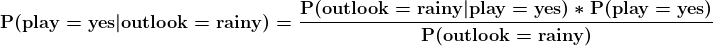

So, what would be *P(rain|play=yes)*?

frequency of *(outlook=rainy)* when *(play=yes)* / frequency of *(play=yes)*

*   From Outlook table: number of *play = "yes"* conditions is 9 [9 yes eventi] 
*   But when it is rainy and still person play - number of occasions is 3
*   Thus, *P(outlook=rainy|play=yes)* = 3/9

frequency of *(play=yes) / total(play)*

*   From Play summary: total observations: 14
*   Number of "yes" = 9
*   Thus, *P(play=yes) = 9/14

frequency of *(outlook=rainy) / total(outlook)*

*   From Outlook table summary: total observations: 14
*   Number of "rainy" observations = 5
*   Thus, *P(outlook=rainy) = 5/14

Now we can calculate it with formula:

In [12]:
P_play_yes_outlook_rainy = (3/9)*(9/14)/(5/14)
P_play_yes_outlook_rainy

0.6

# Example of Machine Learning usage of *Gaussian Naive Bayes Classifier*

In Gaussian Naive Bayes, continuous values associated with each feature are assumed to be distributed according to a Gaussian distribution. A Gaussian distribution is also called Normal distribution. When plotted, it gives a bell shaped curve which is symmetric about the mean of the feature values as shown below [1]

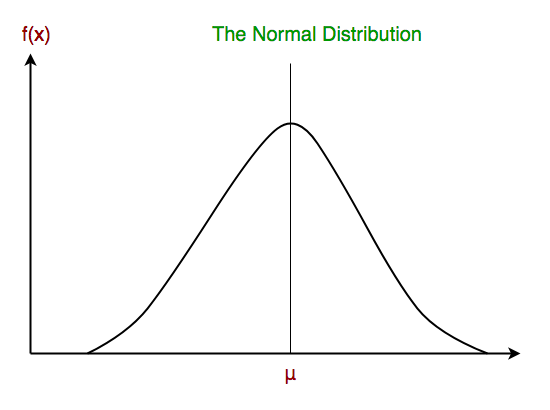

In [13]:
from sklearn.datasets import load_iris

In [14]:
#Load Iris Data-set
iris = load_iris()

X = iris.data

len(X)

150

In [15]:
y = iris.target

len(y)

150

Let's check destributions for first class (here in y array it is show as "0")

In [16]:
import collections
collections.Counter(y)

Counter({0: 50, 1: 50, 2: 50})

And plot KDEs here

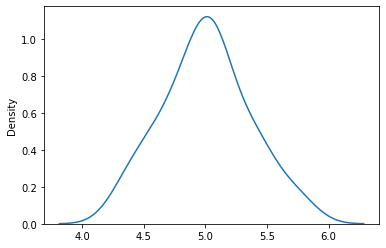

In [17]:
import seaborn as sns

sns.kdeplot(x=X[:50, 0])

In [23]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=1)

from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB() #modelis
gnb.fit(X_train, y_train)

y_pred = gnb.predict(X_test)

from sklearn import metrics

metrics.accuracy_score(y_test, y_pred)*100

95.0

# Materials


1.   https://www.geeksforgeeks.org/naive-bayes-classifiers/

